<a href="https://colab.research.google.com/github/CharityMiller/Lizzo-Lyric-Generator/blob/master/Lizzo_Lyric_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lizzo Lyric Generator 

#### By Charity Miller

I must admit, I love me some Lizzo. I listen to her music to hype up as I code. When I run into errors she resets my 'boss' mentality and elevates my mood to keep working until I solve them. Needless to say, she inspired my idea to run an analysis on my favorite Lizzo songs and use RNNs to create a lyric generator that will create her next big hit!

Let's grab the lyrics of my favorite Lizzo songs Like a Girl and Juice 

#### Import Libraries

In [1]:
import random
import requests
import string
import re
import urllib
import pandas as pd
import numpy as np

#Natural Language Toolkit to process the text as a natural language
import nltk
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

#Tools for visualizing Data
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
from keras.datasets import imdb
from keras.preprocessing import sequence
import keras
import tensorflow as tf
import os
import numpy as np

VOCAB_SIZE = 2800

MAXLEN = 250
BATCH_SIZE = 30

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = VOCAB_SIZE)

Using TensorFlow backend.


`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
17465344/17464789 [==============================] - 3s 0us/step


In [3]:
from google.colab import files
path_to_file = list(files.upload().keys())[0]

Saving Like_a_Girl.txt to Like_a_Girl.txt


**Like A Girl**

In [4]:
la_girl = open(r'Like_a_Girl.txt')
lagirltxt = la_girl.read()
print(lagirltxt)

"Like A Girl"

Uh (Go)

Woke up feelin' like I just might run for president (Run for president)
Even if there ain't no precedent (Nah)
Switchin' up the messagin'
I'm about to add a little estrogen (Huh, yeah)
Buy my whip by myself (By myself)
Pay my rent by myself (By myself)
Only exes that I care about are in my fucking chromosomes
I don't really need you, I'm McCauley Culkin, Home Alone
Bad bitch, diamonds in my collarbone (Yee, yee)
Buy my whip by myself
Pay my rent by myself

Sugar, spice, and I'm nice, show me what you're made of
Crazy, sexy, cool, baby, with or without makeup
Got nothin' to prove (I got nothin' to prove)
But I'ma show you how I do

Find me up in Magic City, bustin' hundreds by the bands
And I throw it (Like a girl)
Go and throw it (Like a girl)
Hangin' out the 750, feelin' bossy in my city
'Cause I run it (Like a girl)
Run it, run it (Like a girl)
I work my femininity, I make these boys get on their knees
Now watch me do it, watch me do it, look it, look it, I'ma

## Bag of Words

Here we will process the text by transforming it into all lowercase and removing delimiters. This will allow us to encode the words in each sentence of the txt file, which helps us to track the frequency of usage. This isn't the method I will be using to create the generator but it helped me to see how integers can be assigned to words.

Here we can see the entire dictionary created with the bag of words technique. Each word in the lyrics have been assigned to an integer. Let's see this again with the 'Like A Girl' lyrics.

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
stop_words = set(stopwords.words('english'))

In [9]:
lagirl_split = word_tokenize(lagirltxt.lower())
lagirl_stpwrds = [word for word in lagirl_split if word.isalpha()]
lagirl_words = [w for w in lagirl_stpwrds if not w in stop_words]
print(lagirl_words[:100])

['like', 'girl', 'uh', 'go', 'woke', 'feelin', 'like', 'might', 'run', 'president', 'run', 'president', 'even', 'ai', 'precedent', 'nah', 'switchin', 'add', 'little', 'estrogen', 'huh', 'yeah', 'buy', 'whip', 'pay', 'rent', 'exes', 'care', 'fucking', 'chromosomes', 'really', 'need', 'mccauley', 'culkin', 'home', 'alone', 'bad', 'bitch', 'diamonds', 'collarbone', 'yee', 'yee', 'buy', 'whip', 'pay', 'rent', 'sugar', 'spice', 'nice', 'show', 'made', 'crazy', 'sexy', 'cool', 'baby', 'without', 'makeup', 'got', 'nothin', 'prove', 'got', 'nothin', 'prove', 'show', 'find', 'magic', 'city', 'bustin', 'hundreds', 'bands', 'throw', 'like', 'girl', 'go', 'throw', 'like', 'girl', 'hangin', 'feelin', 'bossy', 'city', 'run', 'like', 'girl', 'run', 'run', 'like', 'girl', 'work', 'femininity', 'make', 'boys', 'get', 'knees', 'watch', 'watch', 'look', 'look', 'like', 'girl']


Lets count the words in these songs and list the top 20 of each

In [12]:
lg_count = Counter(lagirl_words).most_common(10)
lagirl_count = pd.DataFrame(lg_count)
lagirl_count.columns = ['Term', 'Frequency']
lagirl_count

,Term,Frequency
0,like,35
1,girl,34
2,run,16
3,yeah,11
4,watch,7
5,look,7
6,city,6
7,throw,6
8,show,5
9,go,4


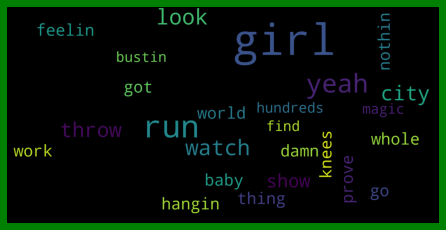

In [13]:
wordcloud = WordCloud(
    background_color='black',
    max_words=25,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(lagirl_words))


plt.figure(figsize = (6, 6), facecolor = 'green')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)